In [42]:
# Import useful packages for DataFrames.  
import pandas as pd
import numpy as np
import datetime as dt
import time

# Import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import *
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# Import API useful packages
import requests
import json
import dotenv
from bs4 import BeautifulSoup
from dotenv import load_dotenv
from io import StringIO

# Import other useful packages
import timeit
import math

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.stattools import jarque_bera
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import the necessary package.
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# The Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans

# The Silhouette method.
# Import the silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Import all the necessary packages.
import nltk 

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Install the required tokenisation model.
nltk.download('punkt')
# Download the stopwords.
nltk.download('stopwords')
# Download the resource.
nltk.download('wordnet')
# Import the Counter class.
from collections import Counter

from nltk.corpus import words
nltk.download('stopwords')
nltk.download('words')

# Import the necessary package.
from textblob import TextBlob

# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import the necessary class.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pkg_resources

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/haticegormez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haticegormez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/haticegormez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haticegormez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/haticegormez/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [43]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/London/central_london_clean.csv'

# Read the CSV file into a DataFrame
central_london_clean = pd.read_csv(name_filepath)

#View the OutPut
print(central_london_clean.head())

  Survey wave (calendar quarter) Equivalent financial quarter   Site ID  \
0        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
1        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
2        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
3        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
4        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   

                             Location Survey date Weather         Time  \
0  Millbank (south of Thorney Street)  2014-01-24     Dry  0600 - 0615   
1  Millbank (south of Thorney Street)  2014-01-24     Dry  0615 - 0630   
2  Millbank (south of Thorney Street)  2014-01-24     Dry  0630 - 0645   
3  Millbank (south of Thorney Street)  2014-01-24     Dry  0645 - 0700   
4  Millbank (south of Thorney Street)  2014-01-24     Dry  0700 - 0715   

                        Period   Direction  Start hour  Start minute  \
0  Early Morning (06:00-07:00)  

In [44]:
# Basic summary statistics
summary_stats = central_london_clean.describe()
print(summary_stats)

          Start hour   Start minute  Number of private cycles  \
count  743317.000000  743317.000000             743317.000000   
mean       13.501154      22.500414                 14.846339   
std         4.609249      16.770548                 26.264774   
min         6.000000       0.000000                  0.000000   
25%        10.000000      15.000000                  2.000000   
50%        14.000000      30.000000                  7.000000   
75%        18.000000      45.000000                 16.000000   
max        21.000000      45.000000               1177.000000   

       Number of cycle hire bikes   Total cycles  
count               743317.000000  743317.000000  
mean                     1.830783      16.677122  
std                      3.314048      28.680732  
min                      0.000000       0.000000  
25%                      0.000000       3.000000  
50%                      1.000000       8.000000  
75%                      2.000000      18.000000  
max   

In [45]:
# Convert 'Survey date' to datetime
central_london_clean['Survey date'] = pd.to_datetime(central_london_clean['Survey date'], format='%d/%m/%y', errors='coerce')

# View the OutPut
print(central_london_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743317 entries, 0 to 743316
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Survey wave (calendar quarter)  743317 non-null  object        
 1   Equivalent financial quarter    743317 non-null  object        
 2   Site ID                         743317 non-null  object        
 3   Location                        743317 non-null  object        
 4   Survey date                     0 non-null       datetime64[ns]
 5   Weather                         743317 non-null  object        
 6   Time                            743317 non-null  object        
 7   Period                          743317 non-null  object        
 8   Direction                       743317 non-null  object        
 9   Start hour                      743317 non-null  float64       
 10  Start minute                    743317 non-null  float64

In [46]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/London/inner_london_clean_no_duplicates.csv'

# Read the CSV file into a DataFrame
inner_london_clean = pd.read_csv(name_filepath)

#View the OutPut
print(inner_london_clean.head())

   Survey wave (year)   Site ID    Location Survey date Weather         Time  \
0              2015.0  INNCY001  Grove Road  2015-05-20     Dry  0600 - 0615   
1              2015.0  INNCY001  Grove Road  2015-05-20     Dry  0615 - 0630   
2              2015.0  INNCY001  Grove Road  2015-05-20     Dry  0630 - 0645   
3              2015.0  INNCY001  Grove Road  2015-05-20     Dry  0645 - 0700   
4              2015.0  INNCY001  Grove Road  2015-05-20     Dry  0700 - 0715   

                        Period   Direction  Start hour  Start minute  \
0  Early Morning (06:00-07:00)  Northbound         6.0           0.0   
1  Early Morning (06:00-07:00)  Northbound         6.0          15.0   
2  Early Morning (06:00-07:00)  Northbound         6.0          30.0   
3  Early Morning (06:00-07:00)  Northbound         6.0          45.0   
4        AM peak (07:00-10:00)  Northbound         7.0           0.0   

   Number of private cycles  Number of cycle hire bikes  Total cycles  
0             

In [47]:
# Basic summary statistics
summary_stats = inner_london_clean.describe()

In [48]:
# Convert 'Survey date' to datetime
inner_london_clean['Survey date'] = pd.to_datetime(inner_london_clean['Survey date'], format='%d/%m/%y', errors='coerce')

# Check the first few rows to see the result
print(inner_london_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501467 entries, 0 to 501466
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Survey wave (year)          501467 non-null  float64       
 1   Site ID                     501467 non-null  object        
 2   Location                    501467 non-null  object        
 3   Survey date                 0 non-null       datetime64[ns]
 4   Weather                     501467 non-null  object        
 5   Time                        501467 non-null  object        
 6   Period                      501467 non-null  object        
 7   Direction                   501467 non-null  object        
 8   Start hour                  501467 non-null  float64       
 9   Start minute                501467 non-null  float64       
 10  Number of private cycles    501467 non-null  float64       
 11  Number of cycle hire bikes  501467 non-

In [49]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/London/outer_london_clean.csv'

# Read the CSV file into a DataFrame
outer_london_clean = pd.read_csv(name_filepath)

#View the OutPut
print(outer_london_clean.head())

   Survey wave (year)   Site ID          Location Survey date Weather  \
0                2015  OUTCY001  High Road Leyton  2015-06-26     Dry   
1                2015  OUTCY001  High Road Leyton  2015-06-26     Dry   
2                2015  OUTCY001  High Road Leyton  2015-06-26     Dry   
3                2015  OUTCY001  High Road Leyton  2015-06-26     Dry   
4                2015  OUTCY001  High Road Leyton  2015-06-26     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

   Start minute  Number of male cycles  Number of female cycles  \
0             0                      2                        1   


In [50]:
#View the OutPut
print(outer_london_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374180 entries, 0 to 374179
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey wave (year)        374180 non-null  int64 
 1   Site ID                   374180 non-null  object
 2   Location                  374180 non-null  object
 3   Survey date               374180 non-null  object
 4   Weather                   374180 non-null  object
 5   Time                      374180 non-null  object
 6   Period                    374180 non-null  object
 7   Direction                 374180 non-null  object
 8   Start hour                374180 non-null  int64 
 9   Start minute              374180 non-null  int64 
 10  Number of male cycles     374180 non-null  int64 
 11  Number of female cycles   374180 non-null  int64 
 12  Number of unknown cycles  374180 non-null  int64 
 13  Total cycles              374180 non-null  int64 
dtypes: i

In [51]:
# Convert 'Survey date' to datetime
outer_london_clean['Survey date'] = pd.to_datetime(outer_london_clean['Survey date'], format='%d/%m/%y', errors='coerce')

# Check the first few rows to see the result
print(outer_london_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374180 entries, 0 to 374179
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Survey wave (year)        374180 non-null  int64         
 1   Site ID                   374180 non-null  object        
 2   Location                  374180 non-null  object        
 3   Survey date               0 non-null       datetime64[ns]
 4   Weather                   374180 non-null  object        
 5   Time                      374180 non-null  object        
 6   Period                    374180 non-null  object        
 7   Direction                 374180 non-null  object        
 8   Start hour                374180 non-null  int64         
 9   Start minute              374180 non-null  int64         
 10  Number of male cycles     374180 non-null  int64         
 11  Number of female cycles   374180 non-null  int64         
 12  Nu

In [52]:
# Basic summary statistics
summary_stats = outer_london_clean.describe()
print(summary_stats)

       Survey wave (year) Survey date     Start hour   Start minute  \
count       374180.000000           0  374180.000000  374180.000000   
mean          2017.854701         NaT      13.500224      22.500080   
min           2015.000000         NaT       6.000000       0.000000   
25%           2016.000000         NaT      10.000000      15.000000   
50%           2018.000000         NaT      14.000000      22.500000   
75%           2019.000000         NaT      17.000000      45.000000   
max           2021.000000         NaT      21.000000      45.000000   
std              1.994198         NaN       4.609057      16.770532   

       Number of male cycles  Number of female cycles  \
count          374180.000000            374180.000000   
mean                1.325993                 0.238292   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%               

In [123]:
# Concatenate the DataFrames vertically
london_combined_df = pd.concat([central_london_clean, inner_london_clean, outer_london_clean], ignore_index=True)
 
# View the OutPut
print(london_combined_df)

        Survey wave (calendar quarter) Equivalent financial quarter   Site ID  \
0              2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
1              2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
2              2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
3              2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
4              2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
...                                ...                          ...       ...   
1618959                            NaN                          NaN  OUTCY451   
1618960                            NaN                          NaN  OUTCY451   
1618961                            NaN                          NaN  OUTCY451   
1618962                            NaN                          NaN  OUTCY451   
1618963                            NaN                          NaN  OUTCY451   

                           

# NYC

In [56]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/New York/cleaned_ny_bicycle_routes.csv'

# Read the CSV file into a DataFrame
cleaned_ny_bicycle_routes = pd.read_csv(name_filepath)

#View the OutPut
print(cleaned_ny_bicycle_routes.head())

  SegmentID  Borough                          Street  FromStreet  \
0        53        5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD   
1        57        5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD   
2        59        5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD   
3        61        5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD   
4        64        5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD   

        ToStreet BikeDirection  LaneCount FacilityType  
0  SWINNERTON ST             2          2     Greenway  
1  SWINNERTON ST             2          2     Greenway  
2  SWINNERTON ST             2          2     Greenway  
3  SWINNERTON ST             2          2     Greenway  
4  SWINNERTON ST             2          2     Greenway  


In [66]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/New York/cleaned_ny_bicycle_parking.csv'

# Read the CSV file into a DataFrame
cleaned_ny_bicycle_parking = pd.read_csv(name_filepath)

#View the OutPut
print(cleaned_ny_bicycle_parking.head())

   BoroughCode BoroughName  CouncilDistrict  AssemblyDistrict  \
0            1   Manhattan               10                72   
1            3    Brooklyn               35                57   
2            4      Queens               29                27   
3            1   Manhattan                1                66   
4            3    Brooklyn               35                57   

   StateSenateDistrict  CongressionalDistrict StreetName IntersectingStreet1  \
0                   31                     13   W 207 ST            BROADWAY   
1                   25                      9    Unknown             Unknown   
2                   16                      6     108 ST               63 RD   
3                   26                     10    Unknown         BLEECKER ST   
4                   25                      8    Unknown         ROCKWELL PL   

  IntersectingStreet2 StreetSide   AssetType  
0           COOPER ST          S  Small Hoop  
1             Unknown    Unknown  

In [5]:
# Get unique values for each column
unique_street_names = cleaned_ny_bicycle_parking['StreetName'].unique()
unique_intersecting_streets1 = cleaned_ny_bicycle_parking['IntersectingStreet1'].unique()
unique_intersecting_streets2 = cleaned_ny_bicycle_parking['IntersectingStreet2'].unique()

# View the OutPut
print("Unique Street Names:", unique_street_names)
print("Unique Intersecting Streets 1:", unique_intersecting_streets1)
print("Unique Intersecting Streets 2:", unique_intersecting_streets2)

Unique Street Names: ['W 207 ST' 'Unknown' '108 ST' ... 'Sterling Place' 'Utica Avenue'
 'Washington Avenue']
Unique Intersecting Streets 1: ['BROADWAY' 'Unknown' '63 RD' ... 'St Marks Place' 'E 6 Street'
 'E 4 Street']
Unique Intersecting Streets 2: ['COOPER ST' 'Unknown' '63 DR' ... 'E 7 Street' 'E 5 Street' '6 Avenue']


In [70]:
# Calculate the total sums for each specified column
sum_council_district = cleaned_ny_bicycle_parking['CouncilDistrict'].sum()
sum_assembly_district = cleaned_ny_bicycle_parking['AssemblyDistrict'].sum()
sum_state_senate_district = cleaned_ny_bicycle_parking['StateSenateDistrict'].sum()
sum_congressional_district = cleaned_ny_bicycle_parking['CongressionalDistrict'].sum()

# Create a new row with the total sums
total_sums_row = {
    'CouncilDistrict': sum_council_district,
    'AssemblyDistrict': sum_assembly_district,
    'StateSenateDistrict': sum_state_senate_district,
    'CongressionalDistrict': sum_congressional_district
}

# View the OutPut
print(total_sums_row)

{'CouncilDistrict': 277232, 'AssemblyDistrict': 696013, 'StateSenateDistrict': 282528, 'CongressionalDistrict': 125059}


In [6]:
# Get the number of unique values for each column
num_unique_street_names = cleaned_ny_bicycle_parking['StreetName'].nunique()
num_unique_intersecting_streets1 = cleaned_ny_bicycle_parking['IntersectingStreet1'].nunique()
num_unique_intersecting_streets2 = cleaned_ny_bicycle_parking['IntersectingStreet2'].nunique()

# View the OutPut
print("Number of Unique Street Names:", num_unique_street_names)
print("Number of Unique Intersecting Streets 1:", num_unique_intersecting_streets1)
print("Number of Unique Intersecting Streets 2:", num_unique_intersecting_streets2)

Number of Unique Street Names: 1672
Number of Unique Intersecting Streets 1: 2609
Number of Unique Intersecting Streets 2: 2725


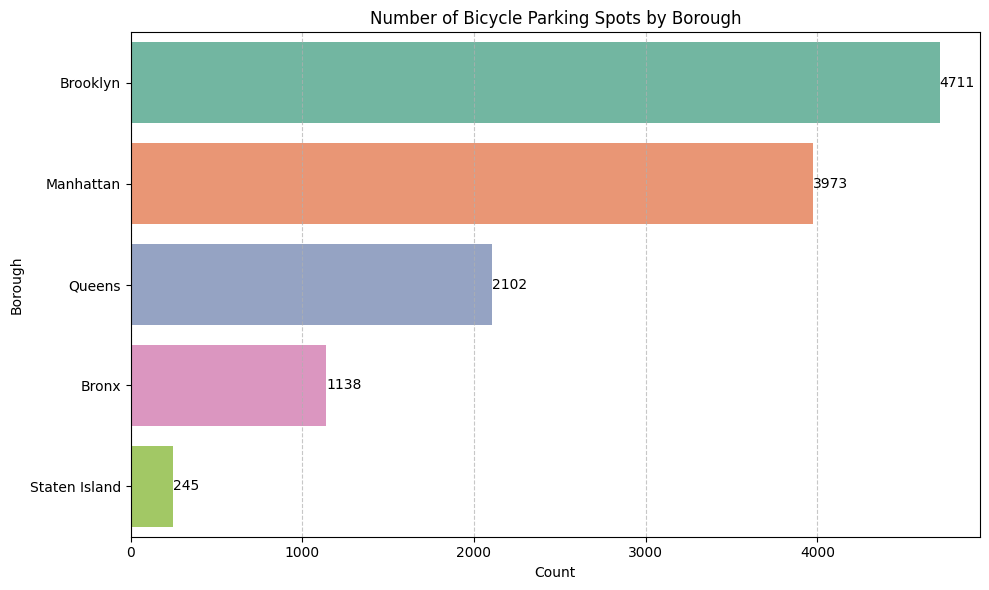

In [7]:
# 'Cleaned_ny_bicycle_parking' is a DataFrame with a 'BoroughName' column
parking_counts = cleaned_ny_bicycle_parking['BoroughName'].value_counts()

# Set a custom color palette
colors = sns.color_palette("Set2")

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y=parking_counts.index, x=parking_counts.values, palette=colors)
plt.title('Number of Bicycle Parking Spots by Borough')
plt.ylabel('Borough')
plt.xlabel('Count')

# Add labels to the bars
for i, count in enumerate(parking_counts):
    plt.text(count, i, str(count), ha='left', va='center')

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

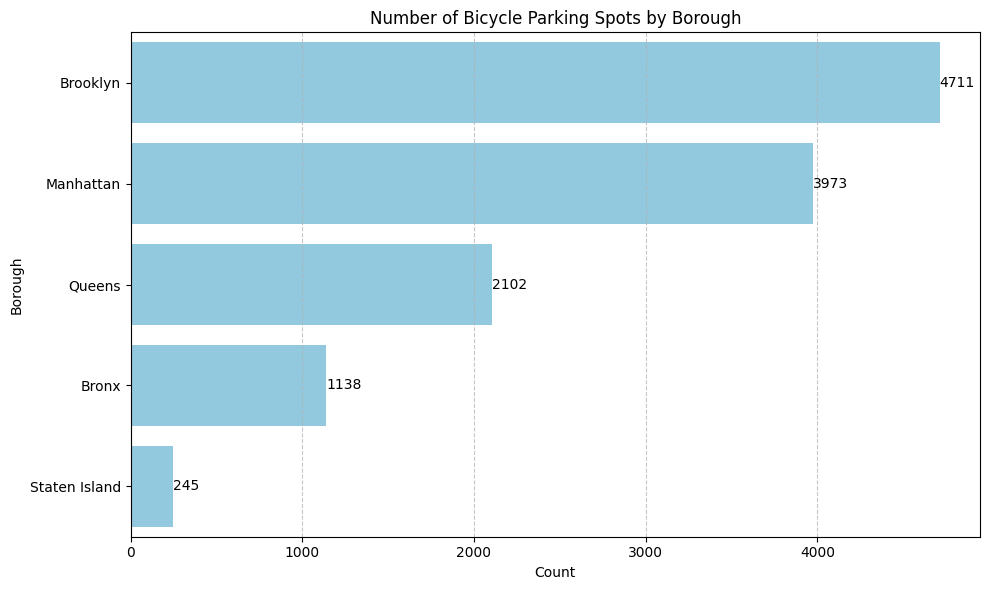

In [8]:
# 'Cleaned_ny_bicycle_parking' is a DataFrame with a 'BoroughName' column
parking_counts = cleaned_ny_bicycle_parking['BoroughName'].value_counts()

# Create a horizontal bar plot with a single color
plt.figure(figsize=(10, 6))
sns.barplot(y=parking_counts.index, x=parking_counts.values, color='skyblue')
plt.title('Number of Bicycle Parking Spots by Borough')
plt.ylabel('Borough')
plt.xlabel('Count')

# Add labels to the bars
for i, count in enumerate(parking_counts):
    plt.text(count, i, str(count), ha='left', va='center')

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

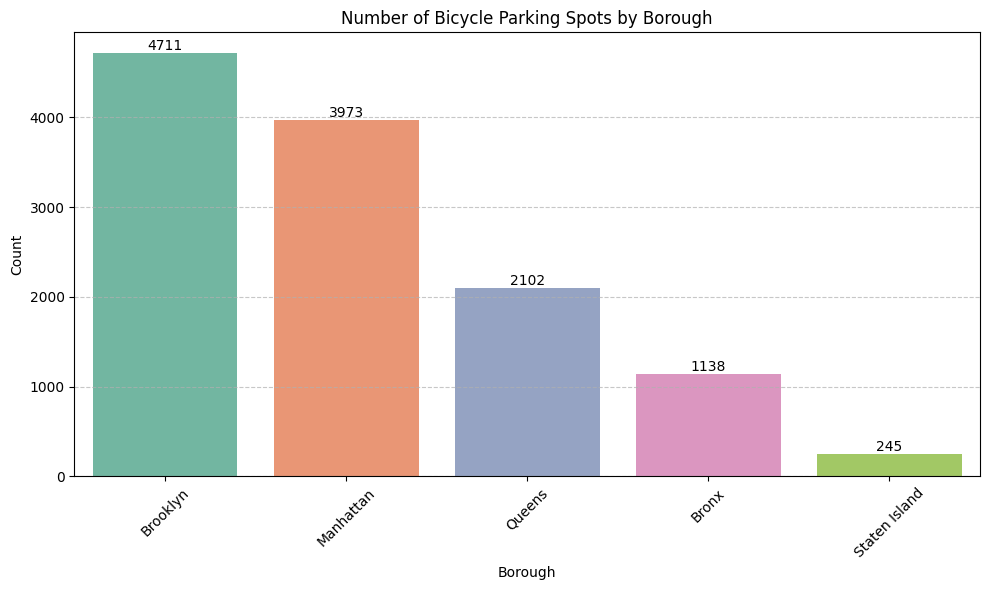

In [154]:
# Compute the number of bicycle parking spots by borough
parking_counts = cleaned_ny_bicycle_parking['BoroughName'].value_counts()

# Set a custom color palette
colors = sns.color_palette("Set2")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=parking_counts.index, y=parking_counts.values, palette=colors)
plt.title('Number of Bicycle Parking Spots by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')

# Add labels to the bars
for i, count in enumerate(parking_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [58]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/New York/cleaned_ny_bicycle_counts.csv'

# Read the CSV file into a DataFrame
cleaned_ny_bicycle_counts = pd.read_csv(name_filepath)

#View the OutPut
print(cleaned_ny_bicycle_counts.head())

          id        date      time  counts  status
0  100009425  2022-06-24  00:00:00      15       0
1  100009425  2022-06-24  00:15:00      12       0
2  100009425  2022-06-24  00:30:00      14       0
3  100009425  2022-06-24  00:45:00       5       0
4  100009425  2022-06-24  01:00:00      10       0


In [65]:
#View the OutPut
print(cleaned_ny_bicycle_counts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167507 entries, 0 to 4167506
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   date    object
 2   time    object
 3   counts  int64 
 4   status  int64 
dtypes: int64(3), object(2)
memory usage: 159.0+ MB
None


In [98]:
# Basic summary statistics
summary_stats = cleaned_ny_bicycle_counts.describe()
print(summary_stats)

                 id        counts        status
count  4.167507e+06  4.167507e+06  4.167507e+06
mean   1.159444e+08  2.737476e+01  1.242674e+00
std    5.413317e+07  4.234732e+01  1.851069e+00
min    1.000050e+08  0.000000e+00  0.000000e+00
25%    1.000094e+08  2.000000e+00  0.000000e+00
50%    1.000100e+08  1.300000e+01  0.000000e+00
75%    1.000573e+08  3.800000e+01  4.000000e+00
max    3.000240e+08  1.805000e+03  4.000000e+00


# Sydney

In [11]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/Sydney/cleaned_syd_bicycle_count_sites.csv'

# Read the CSV file into a DataFrame
cleaned_syd_bicycle_count_sites = pd.read_csv(name_filepath)

#View the OutPut
print(cleaned_syd_bicycle_count_sites.head())

    Longitude   Latitude  Index  LocationID  \
0  151.204168 -33.882846      1           1   
1  151.208601 -33.878286      2           2   
2  151.205783 -33.863364      3           3   
3  151.209897 -33.873292      4           4   
4  151.209083 -33.879797      5           5   

                                IntersectionLocation  
0  Intersection of Broadway, Lee Street, Quay Str...  
1  Intersection of Castlereagh Street and Goulbur...  
2  Intersection of Grosvenor Street and Glouceste...  
3   Intersection of Elizabeth Street and Park Street  
4  Intersection of Elizabeth Street, Wentworth Av...  


In [12]:
# 'Cleaned_syd_bicycle_count_sites' is a DataFrame with 'LocationID' and 'IntersectionLocation' columns
unique_location_id = cleaned_syd_bicycle_count_sites['LocationID'].unique()
unique_intersection_location = cleaned_syd_bicycle_count_sites['IntersectionLocation'].unique()

# Print unique values and their counts
print("Unique Location IDs:", unique_location_id)
print("Number of Unique Location IDs:", len(unique_location_id))
print("Unique Intersection Locations:", unique_intersection_location)
print("Number of Unique Intersection Locations:", len(unique_intersection_location))

Unique Location IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  82  83  84  85  86  87  88  89  90  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107  34  81  95 108
 109]
Number of Unique Location IDs: 109
Unique Intersection Locations: ['Intersection of Broadway, Lee Street, Quay Street, George Street and Pitt Street'
 'Intersection of Castlereagh Street and Goulburn Street'
 'Intersection of Grosvenor Street and Gloucester Street'
 'Intersection of Elizabeth Street and Park Street'
 'Intersection of Elizabeth Street, Wentworth Avenue and Campbell Street'
 'Intersection of George Street and Alfred Street'
 'Intersection of George Street, Park Street and Druitt Street'
 'Intersection of George Str

In [16]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/Sydney/cleaned_syd_bicycle_count_surveys.csv'

# Read the CSV file into a DataFrame
cleaned_syd_bicycle_count_surveys = pd.read_csv(name_filepath)

#View the OutPut
print(cleaned_syd_bicycle_count_surveys.head())

   SiteID    Month  Year  Total number of bicycles  ObjectId2  Time_06:00  \
0      51    March  2010                       263          1          12   
1       1  October  2015                       383          2          37   
2      52    March  2010                       136          3           7   
3      53    March  2010                       333          4          25   
4       2  October  2015                       447          5          32   

   Time_07:00  Time_08:00  Time_16:00  Time_17:00  Time_18:00  
0          45          56          27          56          67  
1          69         100          47          68          62  
2          18          31          29          30          21  
3          86          93          15          62          52  
4          75          72          56         114          98  


In [20]:
#View the OutPut
print(cleaned_syd_bicycle_count_surveys.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SiteID                    2215 non-null   int64 
 1   Month                     2215 non-null   object
 2   Year                      2215 non-null   int64 
 3   Total number of bicycles  2215 non-null   int64 
 4   ObjectId2                 2215 non-null   int64 
 5   Time_06:00                2215 non-null   int64 
 6   Time_07:00                2215 non-null   int64 
 7   Time_08:00                2215 non-null   int64 
 8   Time_16:00                2215 non-null   int64 
 9   Time_17:00                2215 non-null   int64 
 10  Time_18:00                2215 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 190.5+ KB
None


In [17]:
# List Unique Values in the BoroName Column
unique_SiteID = cleaned_syd_bicycle_count_surveys['SiteID'].unique()
print("Unique SiteID:", unique_SiteID)

Unique SiteID: [ 51   1  52  53   2  54  55   3  56   4  57   5   6   7  58   8  59   9
  60  10  61  11  62  12  63  13  64  14  65  15  66  67  16  68  69  17
  70  18  71  72  19  20  73  21  74  75  22  76  23  77  78  24  79  80
  25  81  82  26  83  27  84  85  28  86  29  87  30  88  31  89  32  90
  33  91  34  92  35  93  36  94  37  95  38  39  40  41  42  43  44  45
  46  47  48  49  50  96  97  98  99 100 101 102 103 105 106 107 104 108
 109 110]


In [63]:
# Assuming 'cleaned_syd_bicycle_count_surveys' is your DataFrame
cleaned_syd_bicycle_count_surveys['SiteID'] = cleaned_syd_bicycle_count_surveys['SiteID'].astype(str)

# Verify the change by viewing the output of the info() method
print(cleaned_syd_bicycle_count_surveys.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SiteID                    2215 non-null   object
 1   Month                     2215 non-null   object
 2   Year                      2215 non-null   int64 
 3   Total number of bicycles  2215 non-null   int64 
 4   ObjectId2                 2215 non-null   int64 
 5   Time_06:00                2215 non-null   int64 
 6   Time_07:00                2215 non-null   int64 
 7   Time_08:00                2215 non-null   int64 
 8   Time_16:00                2215 non-null   int64 
 9   Time_17:00                2215 non-null   int64 
 10  Time_18:00                2215 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 190.5+ KB
None


In [64]:
# Subset the DataFrame
subset_df = cleaned_syd_bicycle_count_surveys[['SiteID', 'Total number of bicycles']]

# Group by 'SiteID' and sum the 'Total number of bicycles'
grouped_df = subset_df.groupby('SiteID').sum().reset_index()

# Sort the values based on the summed 'Total number of bicycles' column
sorted_df = grouped_df.sort_values(by='Total number of bicycles', ascending=False)

# Display the resulting DataFrame
print(sorted_df)

   SiteID  Total number of bicycles
86     78                     48873
24     21                     43756
80     72                     43384
82     74                     42254
14     12                     40658
..    ...                       ...
92     83                      1212
8     106                      1004
69     62                       979
3     101                       946
13    110                        81

[110 rows x 2 columns]


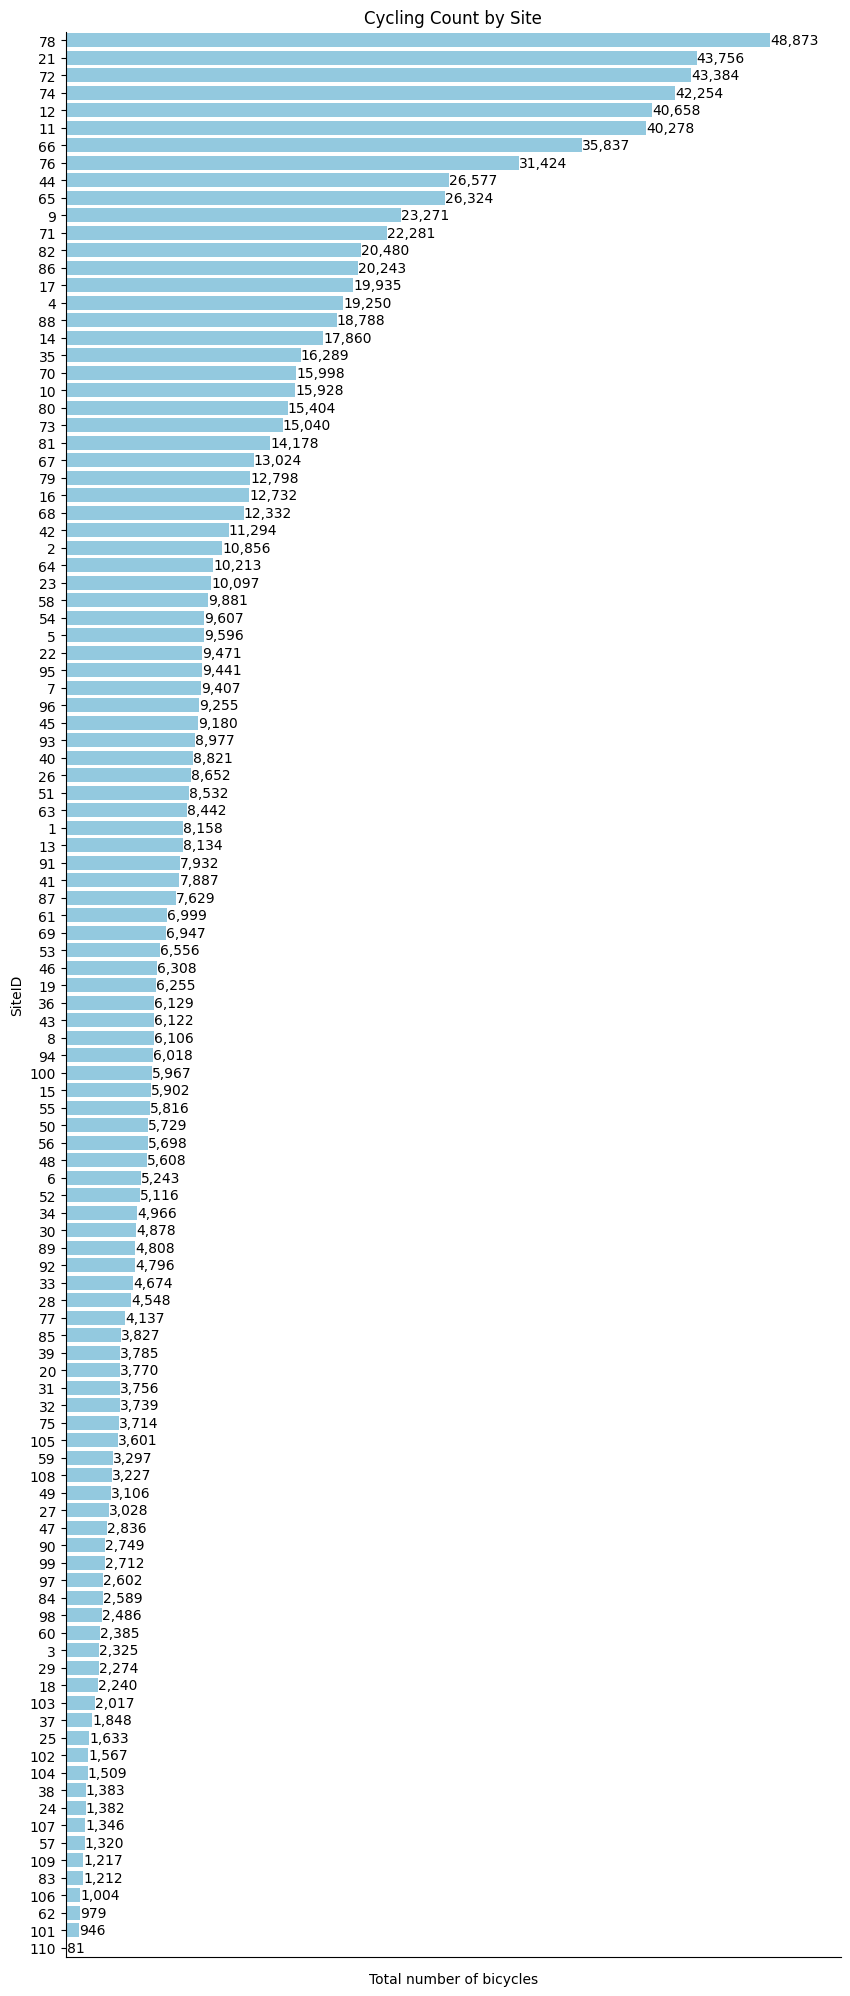

In [28]:
# Visualise top locations by national category
fig, axs = plt.subplots(figsize=(10, 25))
sns.barplot(x='Total number of bicycles', y='SiteID', data=sorted_df, ax=axs, color='skyblue')  # Set a single color

# Set title
axs.set_title("Cycling Count by Site")

# Remove border from chart
sns.despine()

# Remove axis as bar labels will be added to the chart
axs.set(xticklabels=[])
axs.tick_params(bottom=False)

# Make room for bar labels
axs.margins(x=0.1)

# Add bar labels with no decimal points and thousands separator
for bars in axs.containers:
    axs.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])

# Display the plot
plt.show()

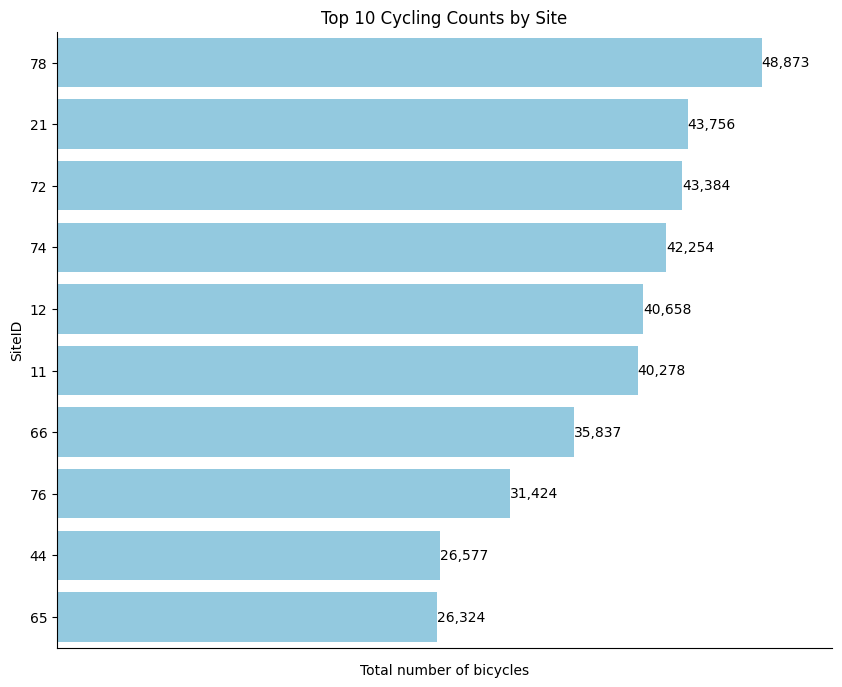

In [40]:
# Sorted in descending order
sorted_df = sorted_df.sort_values(by='Total number of bicycles', ascending=False)

# Select the top 10
top_10_sorted_df = sorted_df.head(10)

# Visualise top 10 locations by total number of bicycles
fig, axs = plt.subplots(figsize=(10, 8))  # Adjusted figsize for top 10
sns.barplot(x='Total number of bicycles', y='SiteID', data=top_10_sorted_df, ax=axs, color='skyblue')

# Set title
axs.set_title("Top 10 Cycling Counts by Site")

# Remove border from chart
sns.despine()

# Remove axis as bar labels will be added to the chart
axs.set(xticklabels=[])
axs.tick_params(bottom=False)

# Make room for bar labels
axs.margins(x=0.1)

# Add bar labels with no decimal points and thousands separator
for bars in axs.containers:
    axs.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])

# Display the plot
plt.show()

In [31]:
# Save the figure to your local Downloads directory
fig.savefig('/Users/haticegormez/Downloads/cycling_count_by_site.png')

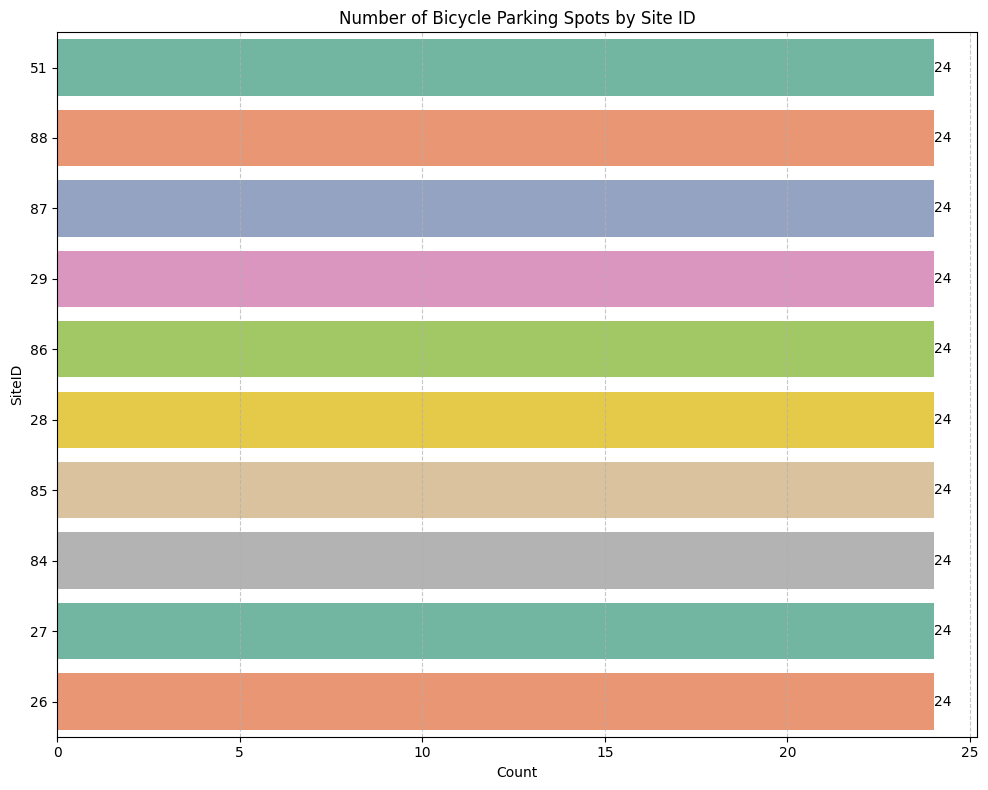

In [36]:
# 'Cleaned_ny_bicycle_parking' is your DataFrame and it has a 'SiteID' column
siteid_counts = cleaned_syd_bicycle_count_surveys['SiteID'].value_counts()

# Set a custom color palette
colors = sns.color_palette("Set2")

# Create a horizontal bar plot for the top 10 SiteIDs
plt.figure(figsize=(10, 8))  # Adjust the figure size if necessary
sns.barplot(y=top_siteid_counts.index, x=top_siteid_counts.values, palette=colors)
plt.title('Number of Bicycle Parking Spots by Site ID')
plt.ylabel('SiteID')
plt.xlabel('Count')

# Add labels to the bars
for i, count in enumerate(top_siteid_counts):
    plt.text(count, i, str(count), ha='left', va='center')

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

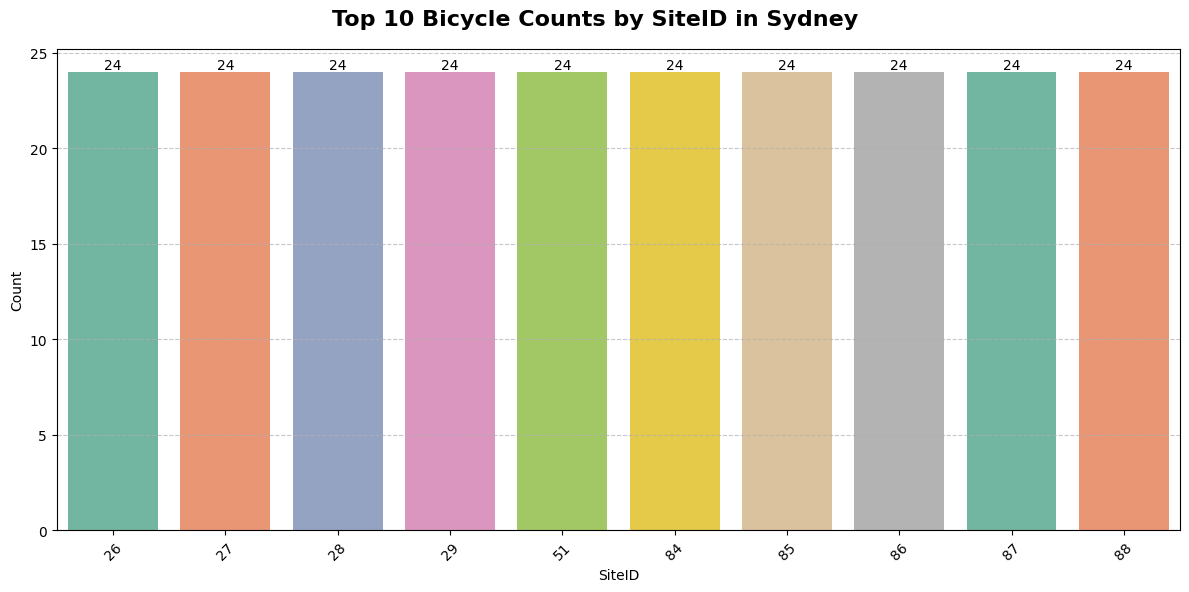

In [156]:
# Compute the number of bicycle counts by SiteID and select the top 10
top_10_sites = cleaned_syd_bicycle_count_surveys['SiteID'].value_counts().head(10)

# Set a custom color palette
colors = sns.color_palette("Set2")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_sites.index, y=top_10_sites.values, palette=colors)

# Add a headline
plt.suptitle('Top 10 Bicycle Counts by SiteID in Sydney', fontsize=16, fontweight='bold')

plt.xlabel('SiteID')
plt.ylabel('Count')

# Add labels to the bars
for i, count in enumerate(top_10_sites):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [100]:
# Calculate the total number of bicycles counted in London, New York, and Sydney
total_bicycles_central_london = central_london_clean['Total cycles'].sum()
total_bicycles_inner_london = inner_london_clean['Total cycles'].sum()
total_bicycles_outer_london = outer_london_clean['Total cycles'].sum()
total_bicycles_ny = cleaned_ny_bicycle_counts['counts'].sum()
total_bicycles_sydney = cleaned_syd_bicycle_count_surveys['Total number of bicycles'].sum()

# Print the total counts
print(f"Total bicycles counted in Central London: {total_bicycles_central_london}")
print(f"Total bicycles counted in Inner London: {total_bicycles_inner_london}")
print(f"Total bicycles counted in Outer London: {total_bicycles_outer_london}")
print(f"Total bicycles counted in New York: {total_bicycles_ny}")
print(f"Total bicycles counted in Sydney: {total_bicycles_sydney}")

Total bicycles counted in Central London: 12396388.0
Total bicycles counted in Inner London: 3111496.0
Total bicycles counted in Outer London: 590476
Total bicycles counted in New York: 114084506
Total bicycles counted in Sydney: 1105476


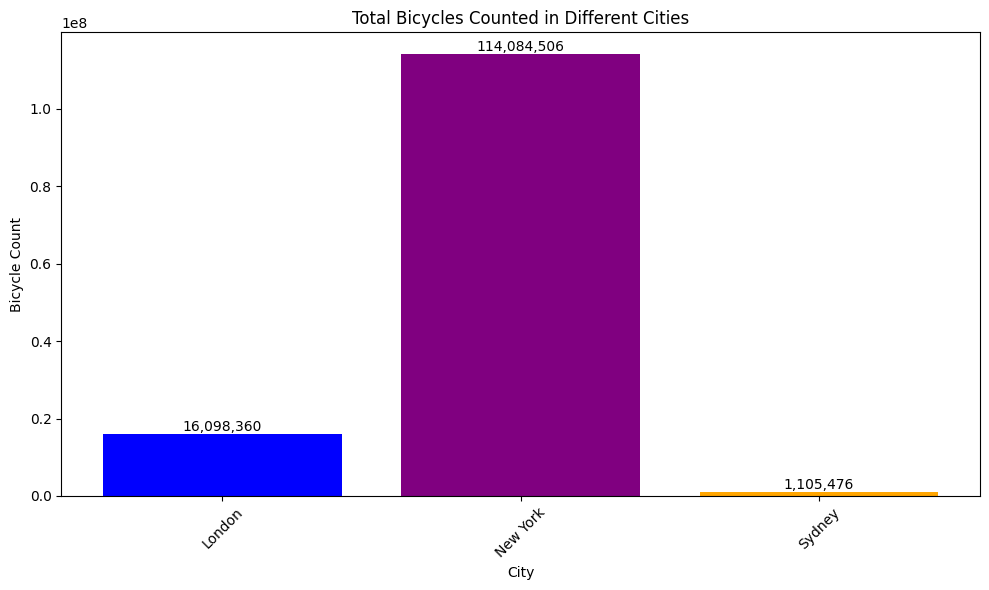

In [101]:
# Data
cities = ['London', 'New York', 'Sydney']
london_counts = [12396388.0, 3111496.0, 590476]  # Central, Inner, Outer London
total_london = sum(london_counts)  # Calculate the total counts for London
bicycle_counts = [total_london, 114084506, 1105476]

# Create the bar graph
plt.figure(figsize=(10, 6))
bar_colors = ['blue', 'purple', 'orange']
bars = plt.bar(cities, bicycle_counts, color=bar_colors)
plt.title('Total Bicycles Counted in Different Cities')
plt.xlabel('City')
plt.ylabel('Bicycle Count')
plt.xticks(rotation=45)

# Adding the counts on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', ha='center', va='bottom')

plt.tight_layout()

# Show the graph
plt.show()

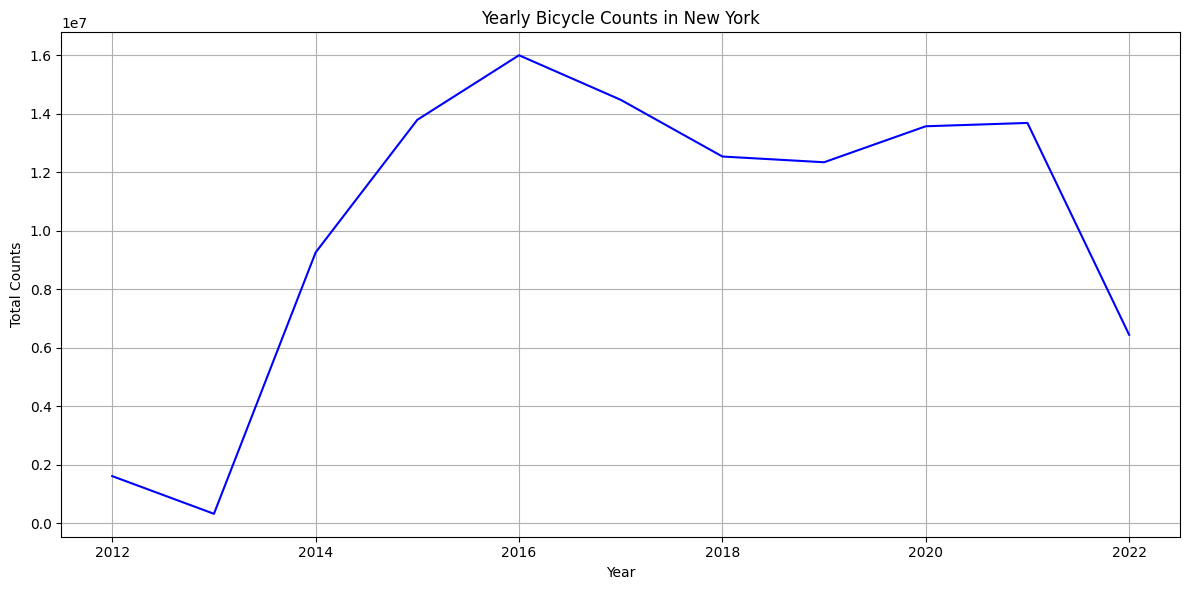

In [110]:
# Convert the 'date' column to a datetime object
cleaned_ny_bicycle_counts['date'] = pd.to_datetime(cleaned_ny_bicycle_counts['date'])

# Extract the year from the 'date' column
cleaned_ny_bicycle_counts['Year'] = cleaned_ny_bicycle_counts['date'].dt.year

# Group data by year for New York
ny_yearly_counts = cleaned_ny_bicycle_counts.groupby('Year')['counts'].sum()

# Create a new figure for the New York plot
plt.figure(figsize=(12, 6))

# New York Yearly Counts Plot
ny_yearly_counts.plot(title="Yearly Bicycle Counts in New York", color='blue')
plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.grid(True)

plt.tight_layout()
plt.show()

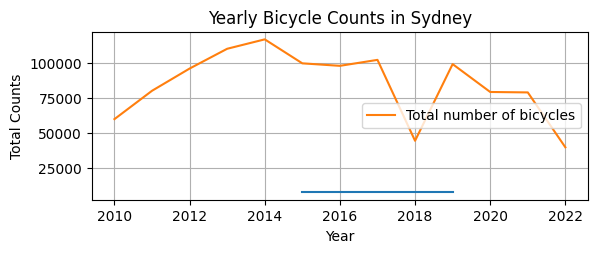

In [105]:
# Group data by year for Sydney
sydney_yearly_counts = cleaned_syd_bicycle_count_surveys.groupby('Year')['Total number of bicycles'].sum()


# Plot for Sydney
plt.subplot(2, 1, 2)
ny_yearly_counts.plot(title="Yearly Bicycle Counts in New York")
sydney_yearly_counts.plot(legend=True, title="Yearly Bicycle Counts in Sydney")
plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.grid(True)

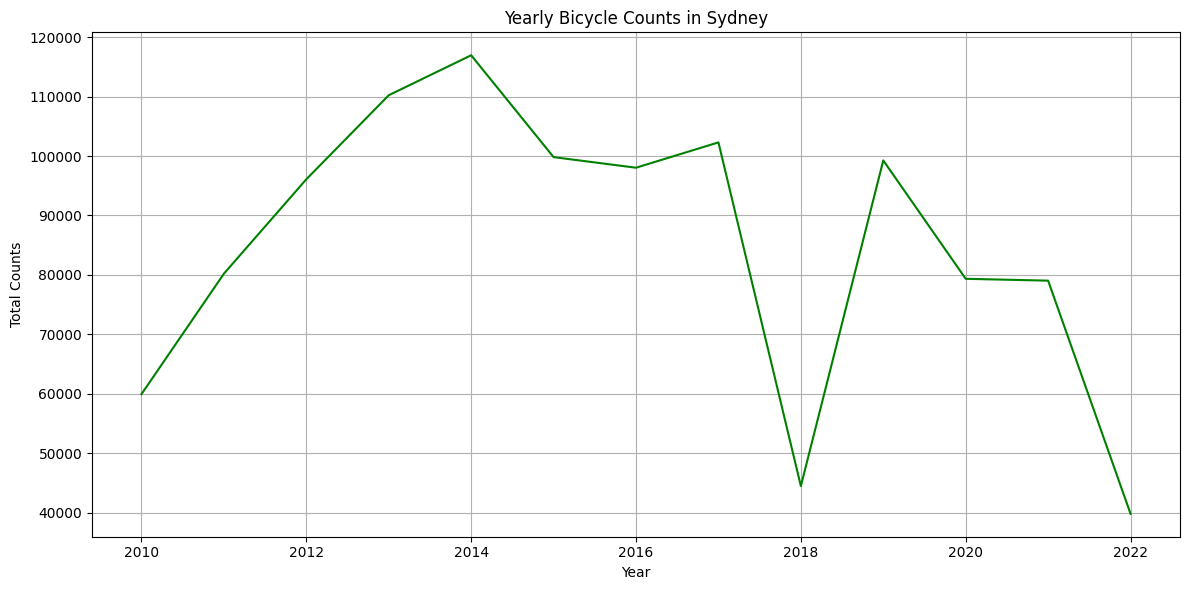

In [107]:
# Group data by year for Sydney
sydney_yearly_counts = cleaned_syd_bicycle_count_surveys.groupby('Year')['Total number of bicycles'].sum()

# Create a new figure for the Sydney plot
plt.figure(figsize=(12, 6))

# Sydney Yearly Counts Plot
sydney_yearly_counts.plot(title="Yearly Bicycle Counts in Sydney", color='green')
plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.grid(True)

plt.tight_layout()
plt.show()

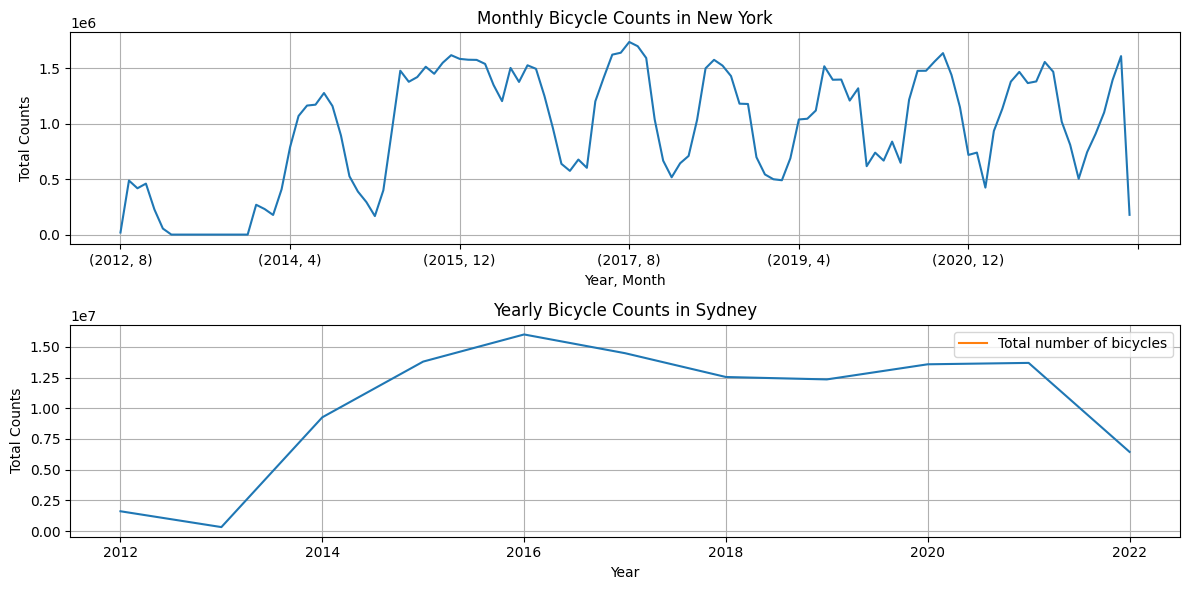

In [53]:
# Analyze trends in cycling counts over time for New York and Sydney
cleaned_ny_bicycle_counts['date'] = pd.to_datetime(cleaned_ny_bicycle_counts['date'])
cleaned_ny_bicycle_counts['Year'] = cleaned_ny_bicycle_counts['date'].dt.year
cleaned_ny_bicycle_counts['Month'] = cleaned_ny_bicycle_counts['date'].dt.month

# Group data by year and month
ny_monthly_counts = cleaned_ny_bicycle_counts.groupby(['Year', 'Month'])['counts'].sum()
ny_yearly_counts = cleaned_ny_bicycle_counts.groupby('Year')['counts'].sum()

sydney_yearly_counts = cleaned_syd_bicycle_count_surveys.groupby('Year')['Total number of bicycles'].sum()

# Create plots to visualize the trends
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
ny_monthly_counts.plot(title="Monthly Bicycle Counts in New York")
plt.xlabel("Year, Month")
plt.ylabel("Total Counts")
plt.grid(True)

plt.subplot(2, 1, 2)
ny_yearly_counts.plot(title="Yearly Bicycle Counts in New York")
sydney_yearly_counts.plot(legend=True, title="Yearly Bicycle Counts in Sydney")
plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.grid(True)

plt.tight_layout()
plt.show()

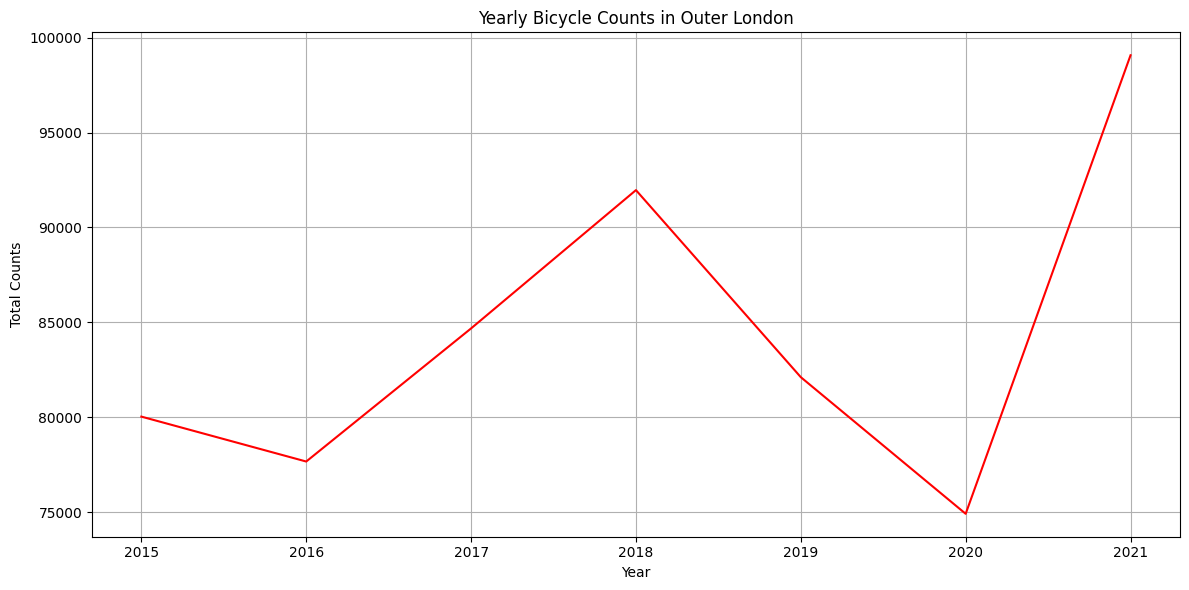

In [112]:
# Group data by year for London
london_yearly_counts = outer_london_clean.groupby('Survey wave (year)')['Total cycles'].sum()

# Create a new figure for the London plot
plt.figure(figsize=(12, 6))

# London Yearly Counts Plot
london_yearly_counts.plot(title="Yearly Bicycle Counts in Outer London", color='red')
plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.grid(True)

plt.tight_layout()
plt.show()

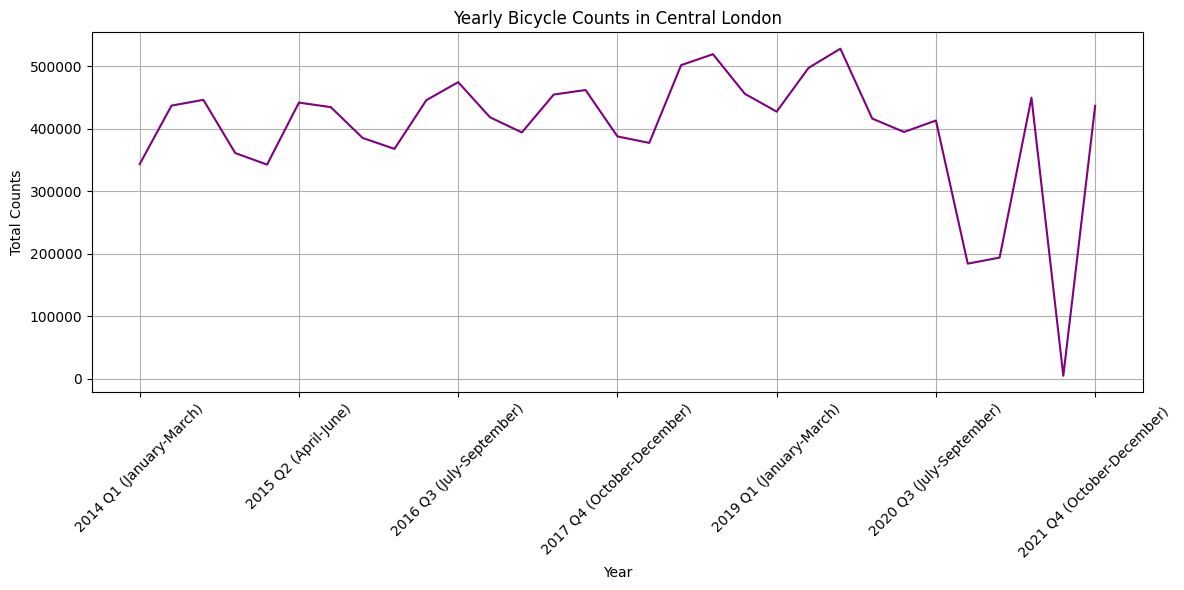

In [117]:
# Group data by year for Central London
central_london_yearly_counts = central_london_clean.groupby('Survey wave (calendar quarter)')['Total cycles'].sum()

# Create a new figure for the Central London plot
plt.figure(figsize=(12, 6))

# Central London Yearly Counts Plot
central_london_yearly_counts.plot(title="Yearly Bicycle Counts in Central London", color='purple')
plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.xticks(rotation=45)  # Rotate x-axis labels by 90 degrees
plt.grid(True)

plt.tight_layout()
plt.show()


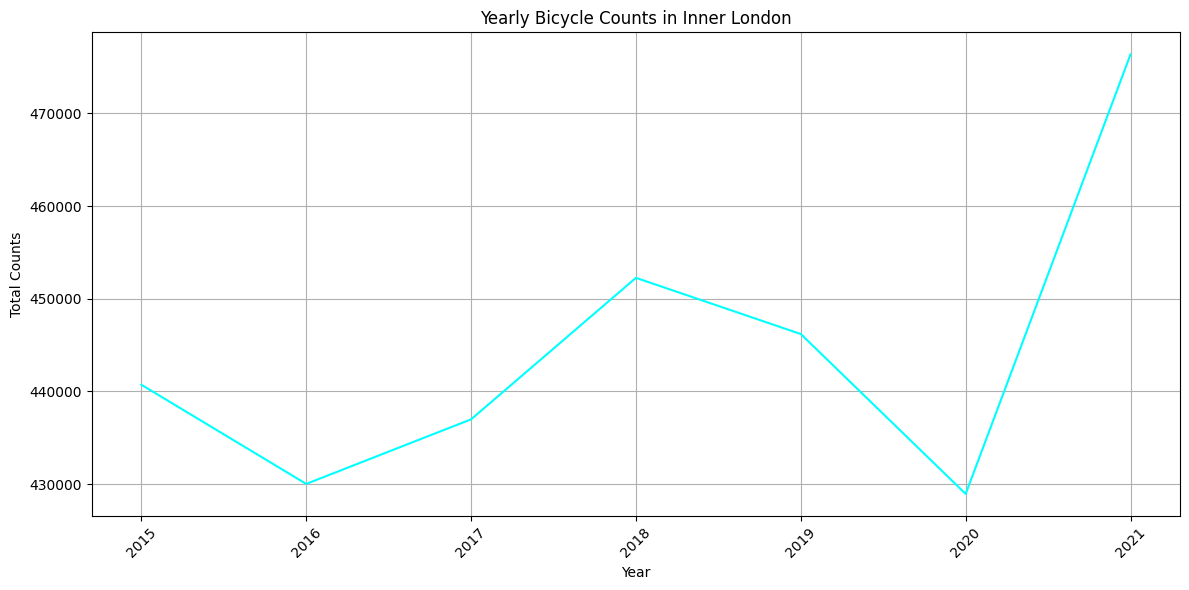

In [118]:
# Group data by year for Inner London
inner_london_yearly_counts = inner_london_clean.groupby('Survey wave (year)')['Total cycles'].sum()

# Create a new figure for the Inner London plot
plt.figure(figsize=(12, 6))

# Inner London Yearly Counts Plot
inner_london_yearly_counts.plot(title="Yearly Bicycle Counts in Inner London", color='cyan')
plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.xticks(rotation=45) 
plt.grid(True)

plt.tight_layout()
plt.show()

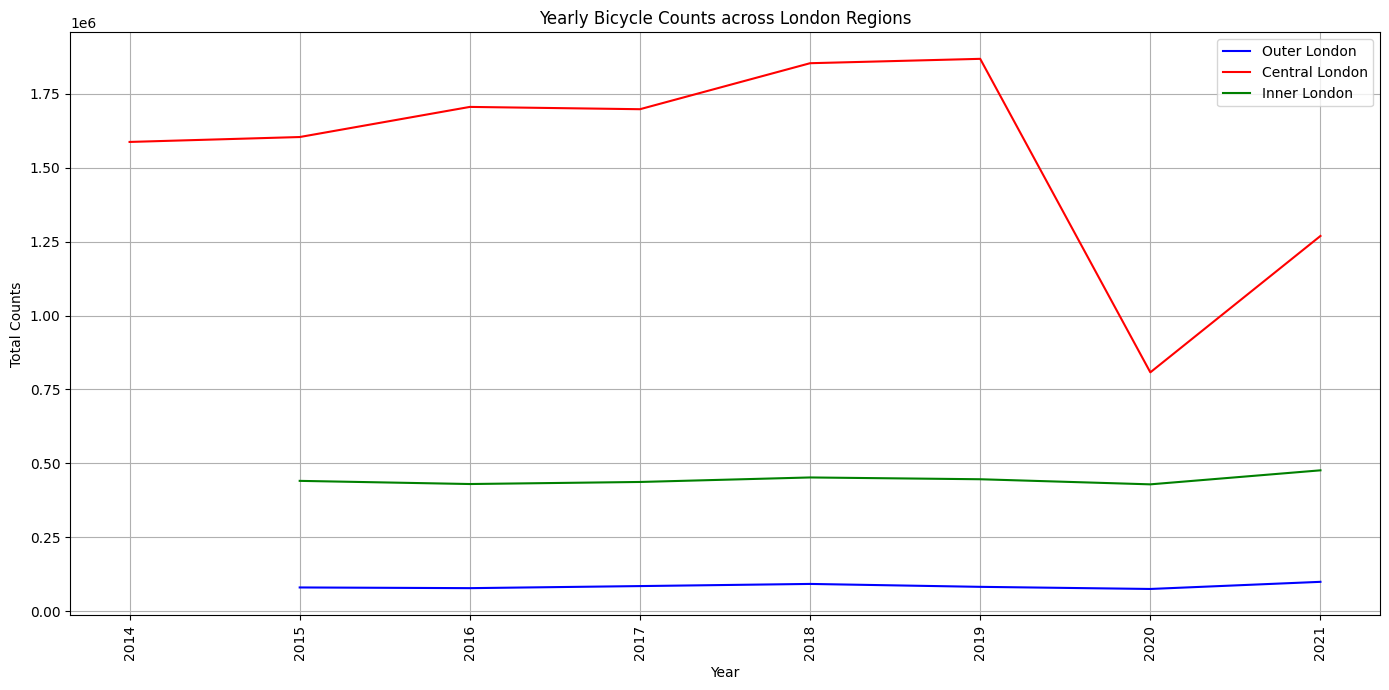

In [121]:
# Extract the year from the 'Survey wave (calendar quarter)' column for Central London data
central_london_clean['Year'] = central_london_clean['Survey wave (calendar quarter)'].str.extract('(\d{4})')

# Convert the extracted year to an integer
central_london_clean['Year'] = central_london_clean['Year'].astype(int)

# Group data by the extracted year for Central London
central_london_yearly_counts = central_london_clean.groupby('Year')['Total cycles'].sum()

# Group data by year for Outer London
outer_london_yearly_counts = outer_london_clean.groupby('Survey wave (year)')['Total cycles'].sum()

# Group data by year for Inner London
inner_london_yearly_counts = inner_london_clean.groupby('Survey wave (year)')['Total cycles'].sum()

# Create a new figure for the combined plot
plt.figure(figsize=(14, 7))

# Outer London Yearly Counts Plot
outer_london_yearly_counts.plot(label="Outer London", color='blue')

# Central London Yearly Counts Plot
central_london_yearly_counts.plot(label="Central London", color='red')

# Inner London Yearly Counts Plot
inner_london_yearly_counts.plot(label="Inner London", color='green')

# Add titles and labels
plt.title("Yearly Bicycle Counts across London Regions")
plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.legend()  # Display the legend to identify the regions
plt.grid(True)

plt.tight_layout()
plt.show()


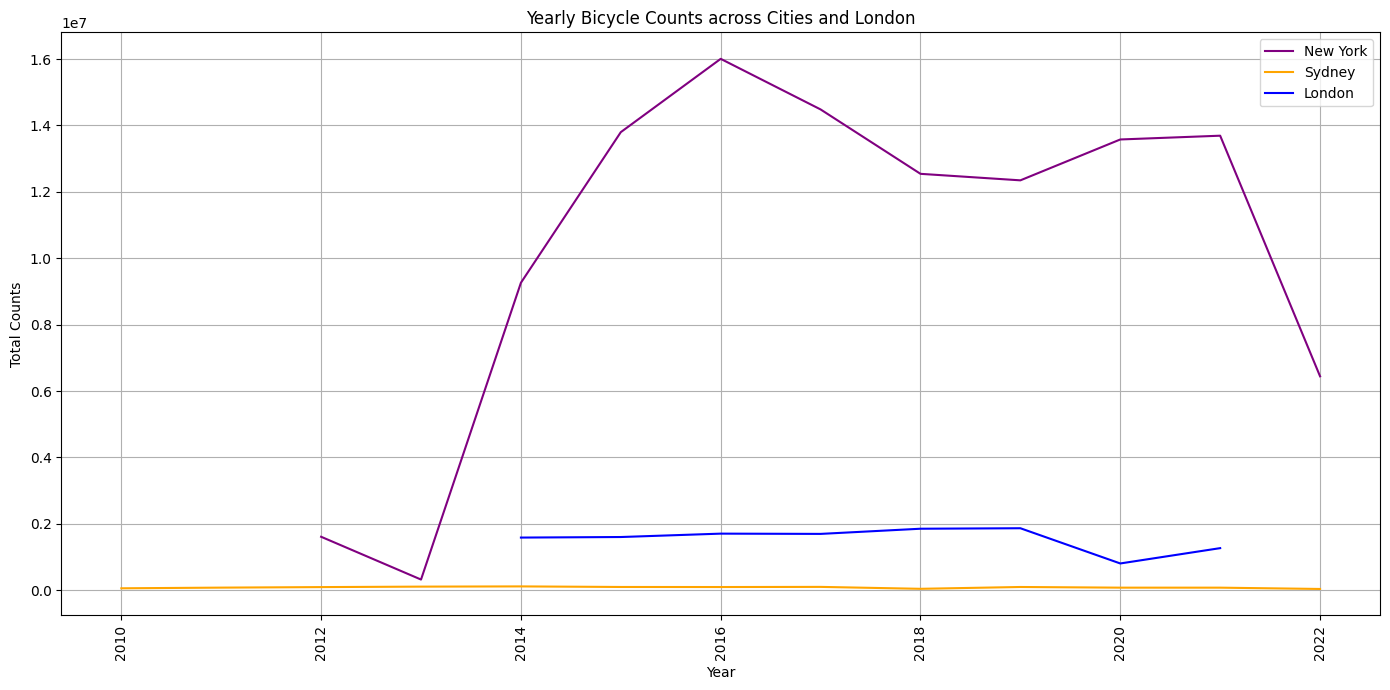

In [126]:
# Group data by year for Sydney
sydney_yearly_counts = cleaned_syd_bicycle_count_surveys.groupby('Year')['Total number of bicycles'].sum()

# Group data by year for New York
ny_yearly_counts = cleaned_ny_bicycle_counts.groupby('Year')['counts'].sum()

# Group data by year for Combined London
london_combined_yearly_counts = london_combined_df.groupby('Year')['Total cycles'].sum()

# Create a new figure for the combined plot
plt.figure(figsize=(14, 7))

# New York Yearly Counts Plot
ny_yearly_counts.plot(label="New York", color='purple')

# Sydney Yearly Counts Plot
sydney_yearly_counts.plot(label="Sydney", color='orange')

# Combined London Yearly Counts Plot
london_combined_yearly_counts.plot(label="London", color='blue')

# Add titles and labels
plt.title("Yearly Bicycle Counts across Cities and London")
plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees for better readability
plt.legend()  # Display the legend to identify the cities and regions
plt.grid(True)

plt.tight_layout()
plt.show()


In [128]:
unique_weather_conditions = london_combined_df['Weather'].unique()
print(unique_weather_conditions)

['Dry' 'Wet' 'Rain' 'Fine' 'Damp' 'Showery' 'Cold/rain' 'Light Rain'
 'Slightly Wet' 'Rain Stopped' 'Road Wet' 'Almost Dry' 'Light Shower'
 'Rain Damp' 'Rain Dry' 'Wet Damp' 'Very Wet' 'V Wet' 'Wet - Dry'
 'Dry - Wet' 'Dry - Rain' 'Damp - Rain' 'Wet/ Dry' 'S. Wet' 'V. Wet'
 'Wet Intermittently' 'Cloudy/ Rain' 'Windy/ Rain' 'Cold/ Rain' 'Drizzle'
 'Lt Rain' 'Dry & Sunny' 'Spitting' 'Showers' 'Cloudy' 'Sunny'
 'Light Showers' 'Hazy' 'Shower' 'Foggy' 'Dull' 'Wet/dry' 'Kdry'
 'Partly Cloudy' 'Rainy' 'Wet T' 'Sun' 'Fair' 'Slight Drizzle'
 'Very Heavy Rain' 'Mild' 'Wet + Windy' 'Blustery' 'Rain/wind'
 'Fine Windy' 'Dry Windy' 'Dry Wet Road' 'Deluge' 'Dry/wet' 'Dry & Wet'
 'V Light Rain' 'Dry A.m Wet P.m' 'Wet Road' 'Cold' 'Cloudy/rain'
 'Wet & Windy' 'Windy' 'Down Pour' 'Dry & Very Windy' 'Mist'
 'Cold Windy Dry' 'Drty' 'Dry (windy)' 'Wet (windy)' 'Fine (windy)'
 'Road Drying Sun Out' 'Dryish' 'Wetish' 'Light Shrs' 'Dry & Windy'
 'Some Showers' 'Rains' 'Dry/sunny' 'Dry/cloudy' 'Dry/hot' 'Sun

In [129]:
# Filter the DataFrame to keep only 'Dry' and 'Wet' weather conditions
filtered_df = london_combined_df.loc[london_combined_df['Weather'].isin(['Dry', 'Wet'])]

In [143]:
# 'Weather_data' and the column with weather conditions is named 'Weather'
weather_counts = london_combined_df['Weather'].value_counts()

# Display the frequency distribution
print(weather_counts)

Weather
Dry                   1408007
Wet                    183628
D                        1440
Light Rain               1068
Fair                     1020
                       ...   
Sunsetting + Windy          2
Windy/cloudy                2
Cloud/rain                  2
Wed                         2
Stopped Raining             2
Name: count, Length: 432, dtype: int64


In [144]:
top_20_conditions = london_combined_df['Weather'].value_counts().head(20)

# Display the top 15 most common weather conditions
print(top_20_conditions)

Weather
Dry               1408007
Wet                183628
D                    1440
Light Rain           1068
Fair                 1020
Damp                  789
Cold                  684
Dry/wet               666
Wet/dry               656
Windy                 534
Unknown               512
Dry & Sunny           446
Clear and Warm        432
Wet                   408
Cold/rain             384
Showers               376
Wet Road              366
Overcast              342
Rainy                 312
Lt Rain               304
Name: count, dtype: int64


In [141]:
london_combined_df['Weather'].replace({
    'Fine': 'Dry',
    'Drizzle': 'Wet',
    'Dry/sunny': 'Dry',
    'Rain': 'Wet',
    'Sunny': 'Dry',
    'Cloudy': 'Dry'
}, inplace=True)

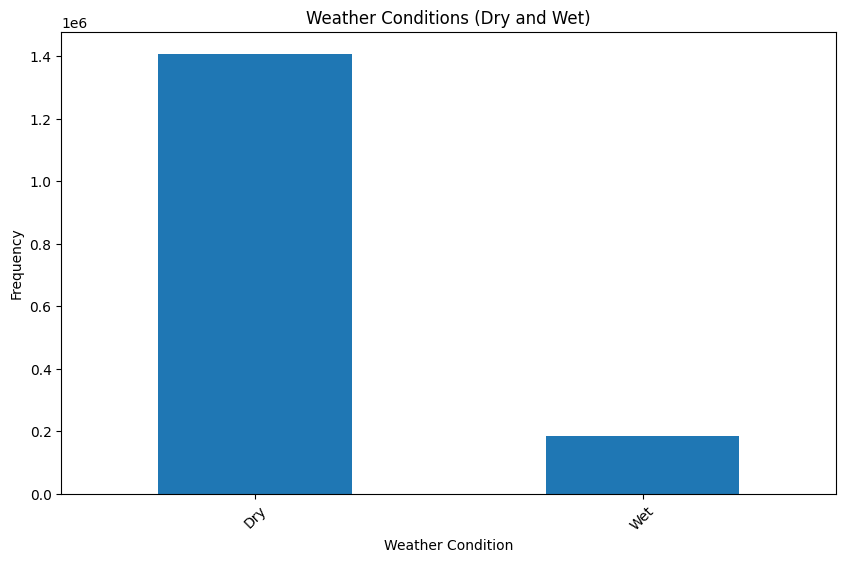

In [146]:
# Filter the top 20 conditions for 'Dry' and 'Wet'
top_20_conditions = top_20_conditions[['Dry', 'Wet']]

# Create the bar graph
plt.figure(figsize=(10, 6))
top_20_conditions.plot(kind='bar')
plt.title('Weather Conditions (Dry and Wet)')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

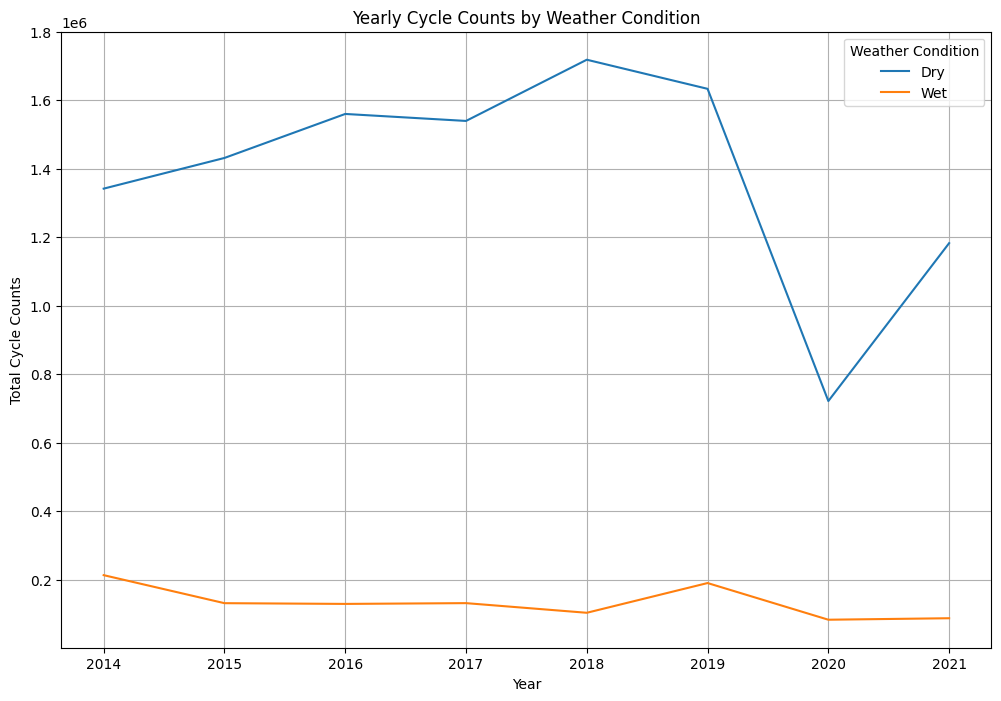

In [151]:
# First, filter the dataframe for 'Dry' and 'Wet' weather conditions
london_combined_filtered_df = london_combined_df[london_combined_df['Weather'].isin(['Dry', 'Wet'])]

# Group data by 'Year' and 'weather_condition' and sum the 'Total cycles'
london_combined_yearly_weather_counts = london_combined_filtered_df.groupby(['Year', 'Weather'])['Total cycles'].sum().reset_index()

# Pivot the DataFrame to have years as rows and weather conditions as columns
pivot_df = london_combined_yearly_weather_counts.pivot(index='Year', columns='Weather', values='Total cycles')

# Plotting the relationship between weather conditions and yearly cycle counts
pivot_df.plot(kind='line', figsize=(12, 8))
plt.title('Yearly Cycle Counts by Weather Condition')
plt.xlabel('Year')
plt.ylabel('Total Cycle Counts')
plt.legend(title='Weather Condition')
plt.grid(True)
plt.show()

In [ ]:
# Compute the number of bicycle parking spots by borough
parking_counts = bicycle_parking['BoroName'].value_counts()

# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=parking_counts.index, y=parking_counts.values)
plt.title('Number of Bicycle Parking Spots by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.show()

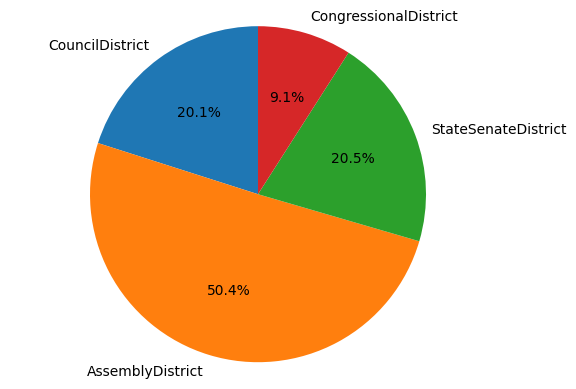

In [71]:
# Given data
district_sums = {
    'CouncilDistrict': 277232,
    'AssemblyDistrict': 696013,
    'StateSenateDistrict': 282528,
    'CongressionalDistrict': 125059
}

# Total bicycles count
total_bicycles = 114084506

# Calculate the percentage of each district sum relative to the total bicycles count
percentages = {k: (v / total_bicycles) * 100 for k, v in district_sums.items()}

# Create lists of district names and their corresponding percentages for plotting
labels = list(percentages.keys())
sizes = list(percentages.values())

# Plot
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

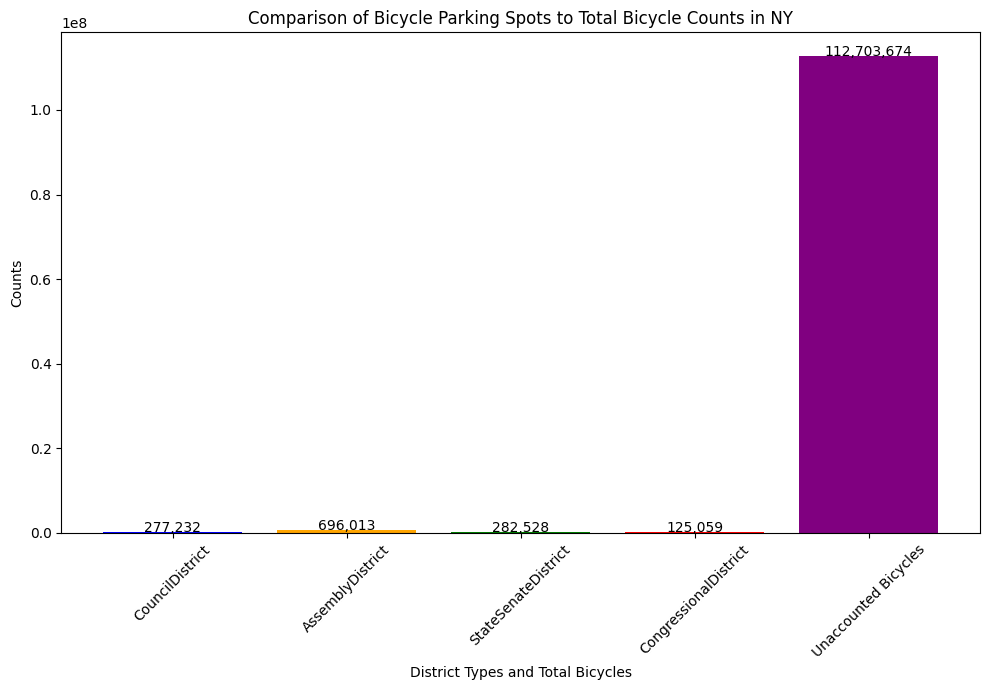

In [72]:
# Given data from the districts and total bicycles count
district_sums = {
    'CouncilDistrict': 277232,
    'AssemblyDistrict': 696013,
    'StateSenateDistrict': 282528,
    'CongressionalDistrict': 125059
}

total_bicycles = 114084506

# Calculate bicycles not accounted for by parking spots
unaccounted_bicycles = total_bicycles - sum(district_sums.values())

# Create a combined list of sums and the total count
combined_sums = list(district_sums.values()) + [unaccounted_bicycles]
district_labels = list(district_sums.keys()) + ['Unaccounted Bicycles']

# Plot
fig, ax = plt.subplots(figsize=(10, 7))

# Create a bar chart
ax.bar(district_labels, combined_sums, color=['blue', 'orange', 'green', 'red', 'purple'])

# Add labels and title
plt.xlabel('District Types and Total Bicycles')
plt.ylabel('Counts')
plt.title('Comparison of Bicycle Parking Spots to Total Bicycle Counts in NY')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the values on the bars
for i, v in enumerate(combined_sums):
    ax.text(i, v + 3, "{:,}".format(v), color='black', ha='center')

# Show the plot
plt.tight_layout()
plt.show()